# Проект по A/B - тестам.

### `chat_id ` из Телеграма:

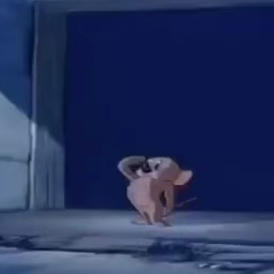

In [ ]:
chat_id = 341395919

In [ ]:
# плотный импорт всех библиотек питона
import pandas as pd
import numpy as np
import scipy
import statsmodels
from statsmodels.stats import weightstats, proportion
import warnings
warnings.filterwarnings("ignore")

------------------

##  <ins>Задание 1.</ins>

### 0. Запосить у бота в Телеграме условие командой `/get_project1_desc`.

**Контекст:**

Мы считаем, что наш продукт достаточно дорогой для клиента.
У нас есть гипотеза, что уменьшение цены продукта позволит повысить частоту продаж и суммарно увеличит доходность продукта.
        
**Тест:**

Мы проводим тест, в рамках которого контролем является продажа продукта со старой ценой, а тестом - продажа продукта с новой ценой.
Целью этого теста является проверка гипотезы роста доходности нашего продукта из-за уменьшения тарифа.

**Статистические вводные:**

Уровень значимости 5%.
Мы хотели бы различать 5%-ное изменение целевой метрики с вероятностью 80%.

### 1. Необходимо выбрать метрику и привести аргументацию.

В условии сказано:

"Целью этого теста является проверка гипотезы роста доходности нашего продукта из-за уменьшения тарифа".

Тогда подходящая для нас целевая метрика:

**NPV** = PV - расходы на привлечение

Так как именно NPV отражает прибыльность нашего продукта

### 2. Альтернатива в критерии.

**Нулевая гипотеза (H0):** Нет статистически значимого различия между старой и новой ценами продукта в отношении доходности продаж.

**Альтернативная гипотеза (H1):** Новая цена продукта статистически значимо повышает доходность продаж по сравнению со старой ценой.

In [ ]:
alpha = 0.05
beta = 0.8

### 3.1. Каков размер выборки? Привести аргументацию и написать как получилось то или иное число.

В данной задаче имеем одностороннюю альтернативу. Воспользуемся следующей формулой для поиска размера выборки:

 $$
 n = \frac{2\sigma^{2} (Z_{1 - \alpha} - Z_{1 - \beta})^{2}}{\Delta^{2}}
 $$

 где $\Delta = MDE$ и $Z$ - квантиль стандартного нормального распределения

 MDE = uplift * average целевой метрики

Для начала рассчитаем стандартное отклонение $\sigma$ нашей целевой метрики на основе исторических данных и MDE.

In [ ]:
hist = pd.read_csv('/content/1/hist_telesales.csv')
sigma = np.std(hist['NPV'])
print('Sigma =', sigma)

MDE = 0.05 * np.mean(hist['NPV'])
print('MDE =', MDE)

Sigma = 677.6602123826715
MDE = 14.07299025789554


In [ ]:
n = 2 * sigma**2 * (scipy.stats.norm.ppf(1-alpha) - scipy.stats.norm.ppf(1-beta))**2 / MDE**2
print('Искомый размер выборки n =', round(n))

Искомый размер выборки n = 28671


### 3.2. Необходимо запросить у бота в Телеграме выборку полученного размера командой `/get_project1_sample {размер выборки}` и вписать <ins>код выборки</ins>:

In [ ]:
# выполняем команду /get_project1_sample 28671
sample_id = 34190

### 4. Принятие решения. Расписать подробно с аргументами.

In [ ]:
control = pd.read_csv('/content/1/Контроль.csv')
test = pd.read_csv('/content/1/Тест.csv')

Проверим распределение выборок целевой метрики на нормальность, чтобы определиться с тестом.

Построим QQ-plot.

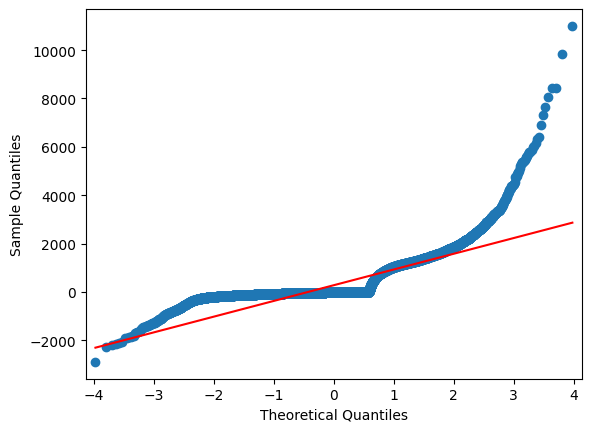

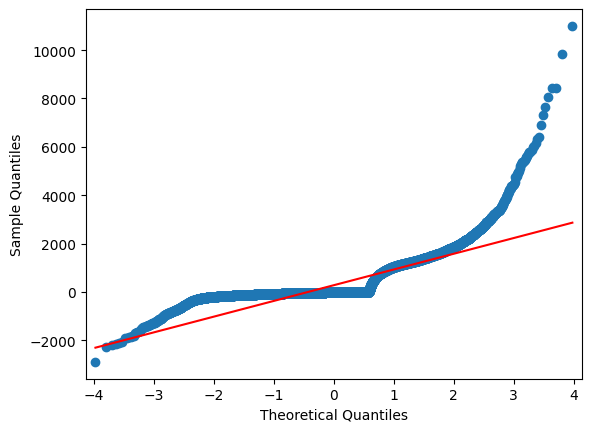

In [ ]:
from statsmodels.graphics.gofplots import qqplot

qqplot(control['NPV'], line='s')

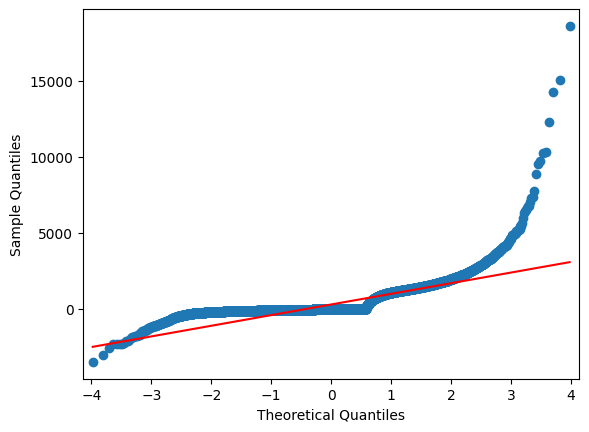

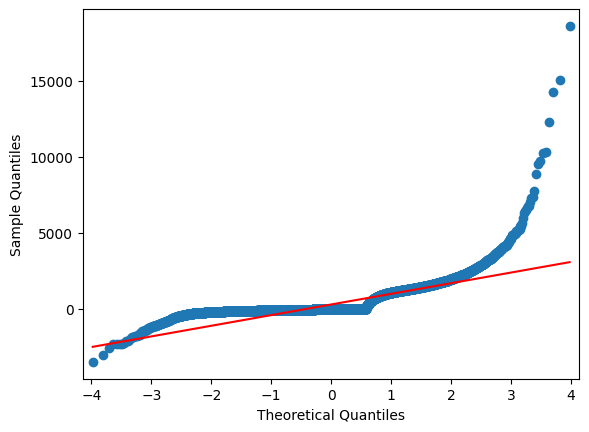

In [ ]:
qqplot(test['NPV'], line='s')

Ось X - теоретические квантили, y - фактические. Если точки будут лежать на прямой, то распределение соответствует нормальному.

Как видим, не лежат)

Распределение не соответствует нормальному, будем использовать **Z-test**.

In [ ]:
z_score, p_value = weightstats.ztest(control['NPV'], test['NPV'], alternative='smaller')

if p_value > 0.05:
  print('H0 не может быть отвергнута')
else:
  print('Может')

Может


**Итог:** Нулевая гипотеза отвергнута.

Следовательно, новая цена продукта статистически значимо повышает доходность продаж по сравнению со старой ценой.

------------------

##  <ins>Задание 2.</ins>

### 0. Запосить у бота в Телеграме условие командой `/get_project2_desc`.

**Контекст**

Мы провели Cust Dev и поняли, что форма авторизации для клиента сложна, и из-за этого часть клиентов отваливается в заявочном процессе.
Мы решили разработать новый процесс авторизации, и у нас есть гипотеза, что он позволит повысить утилизации наших счетов.
        
**Тест**

Мы проводим тест, в рамках которого мы разбиваем весь поток на две части рановероятно, где у одной части (контроля)  старый процесс авторизации, а у второй части (теста) - новый.
Целью этого теста является повышение утилизаций счёта.

**Статистические вводные**

Проверка однородности выбранного параметра осуществяется с уровнем значимости 2%.

Уровень значимости 5%. Мы хотели бы различать 3%-ное изменение целевой метрики с вероятностью 95%.

In [ ]:
alpha2 = 0.03
beta2 = 0.95

### 1. Необходимо выбрать метрику и привести аргументацию.

В задании сказано:

"Целью этого теста является повышение утилизации счёта"

Из этого следует, что целевой метрике соответствует столбец "Флаг утилизации счёта". Именно этот параметр отражает то, что мы хотим повысить в ходе данного теста.

In [ ]:
hist2 = pd.read_csv('/content/2/hist_credit_card.csv')

### 2. Альтернатива в критерии.

**Нулевая гипотеза (H0):** новый процесс авторизации не приведет к увеличению утилизаций счетов.

**Альтернативная гипотеза (H1):** новый процесс авторизации приведет к увеличению утилизаций счетов.

Односторонняя альтернатива.

### 3. Нужно выбрать параметр(-ы), влияющий(-ие) на целевую метрику. Привести аргументацию.

Для поиска параметра, влияющего на целевую метрику, построим корреляционную матрицу.

In [ ]:
corr = hist2.corr()
corr

,ID,Возраст,Доход клиента,Вероятность банкротства,Флаг утилизации счёта,Расходы,PV КК,PV услуги,NPV
ID,1.000000,-0.002624,0.004518,0.001279,-0.000964,-0.000077,-0.003181,-0.005220,-0.003480
Возраст,-0.002624,1.000000,0.001514,-0.004102,0.007277,0.002460,0.003447,0.006117,0.003747
Доход клиента,0.004518,0.001514,1.000000,-0.000882,0.000706,0.001032,-0.002142,-0.001937,-0.002269
Вероятность банкротства,0.001279,-0.004102,-0.000882,1.000000,-0.215398,-0.099635,-0.043319,-0.139128,-0.049433
Флаг утилизации счёта,-0.000964,0.007277,0.000706,-0.215398,1.000000,0.452036,0.204981,0.646524,0.233611
Расходы,-0.000077,0.002460,0.001032,-0.099635,0.452036,1.000000,0.090826,0.294538,0.086146
PV КК,-0.003181,0.003447,-0.002142,-0.043319,0.204981,0.090826,1.000000,0.128742,0.998232
PV услуги,-0.005220,0.006117,-0.001937,-0.139128,0.646524,0.294538,0.128742,1.000000,0.183529
NPV,-0.003480,0.003747,-0.002269,-0.049433,0.233611,0.086146,0.998232,0.183529,1.000000


Параметр для последующей проверки однородности стоит выбирать из тех, которые доступны до прохода человека по процессу заявки (соц-дем, параметры скоринга).

Среди всех доступных параметров нам подходит один - "Вероятность банкротства"

### 4.1. Каков размер выборки? Привести аргументацию и написать как получилось то или иное число.

В данной задаче имеем одностороннюю альтернативу. Воспользуемся следующей формулой для поиска размера выборки:

 $$
 n = \frac{p (1 - p) (Z_{1 - \alpha} - Z_{1 - \beta})^{2}}{k\Delta^{2}}
 $$

 где $k$ - доля теста, p - базовая конверсия, $\Delta = MDE$ и $Z$ - квантиль стандартного нормального распределения

 $MDE$ = uplift * конверсия на исторических данных

In [ ]:
p = np.mean(hist2['Флаг утилизации счёта'])
MDE2 = 0.03 * p
print('MDE =', MDE2)

MDE = 0.02224631860776439


In [ ]:
n2 = p * (1 - p) * (scipy.stats.norm.ppf(1-alpha2) - scipy.stats.norm.ppf(1-beta2))**2 / ( 0.5 * MDE2**2)
print('Искомый размер выборки n =', round(n2))

Искомый размер выборки n = 9628


### 4.2. Необходимо запросить у бота в Телеграме выборку полученного размера командой `/get_project2_sample {размер выборки}` и вписать <ins>код выборки</ins>:

In [ ]:
# выполняем команду /get_project2_sample 9628
sample_id = 19939

### 5. Проверка на однородность, применение критерия. Принятие решения. Расписать подробно с аргументами.

In [ ]:
control2 = pd.read_csv('/content/2/Контроль.csv')
test2 = pd.read_csv('/content/2/Тест.csv')

Проверим наши выборки на однородность по параметру "Вероятность банкротства".

Ситуация - Распределение vs Распределение. (смотрю по табличке из презы по проверке гипотез)

И для данного случая подходит **anderson_ksamp**.

In [ ]:
res = scipy.stats.anderson_ksamp([control2['Вероятность банкротства'], test2['Вероятность банкротства']])

In [ ]:
if res.pvalue > 0.02:
  print('Выборки однородны')
else:
  print('Выборки неоднородны')

Выборки однородны


Для проверки гипотезы равенства конверсий используется Z-тест. (моя первая таска из дз по проверке гипотез).

Выполним его с помощью **proportions_ztest**.

In [ ]:
res = proportion.proportions_ztest([control2['Флаг утилизации счёта'].sum(), test2['Флаг утилизации счёта'].sum()],
                        [n2, n2],
                        alternative='smaller')

In [ ]:
if res[1] > 0.05:
  print('Нулевая гипотеза не может быть отклонена')
else:
  print('Может')

Нулевая гипотеза не может быть отклонена


**Вывод:** Нулевая гипотеза не может быть отклонена, следовательно, новый процесс авторизации не приведет к увеличению утилизаций счетов.

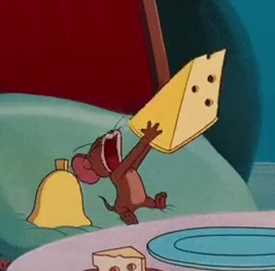

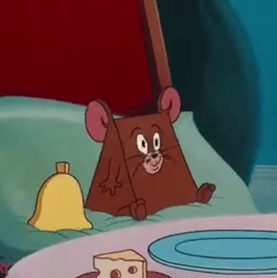